In [1]:
import pandas as pd

from torch.utils.data import DataLoader
from torchvision import transforms

from src.datasets import Tox21Dataset
from src.transforms import SMILESToMol, MolToGreyscale, MolToRDKitDescriptors
from src.target_transforms import BinaryToxicity
from src.utils import plot_greyscale

In [2]:
df = pd.read_csv("../data/tox21_data.csv")
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/tox21_data.csv'

In [ ]:
transform = transforms.Compose(
    [
        SMILESToMol(),
        MolToGreyscale(embed=19, res=0.4),
        # transforms.Normalize(),  # need to standardise somehow
        BinaryToxicity(),
    ]
)

In [4]:
tox21 = Tox21Dataset(csv_path="../data/tox21_raw.csv", transform=transform)
tox21.remove_nan()

In [6]:
dataloader = DataLoader(tox21, batch_size=2, shuffle=True)

# use a generator to get the first batch
dataloader_iter = iter(dataloader)
batch = next(dataloader_iter)
arr, labels = batch
print(arr.shape, labels)

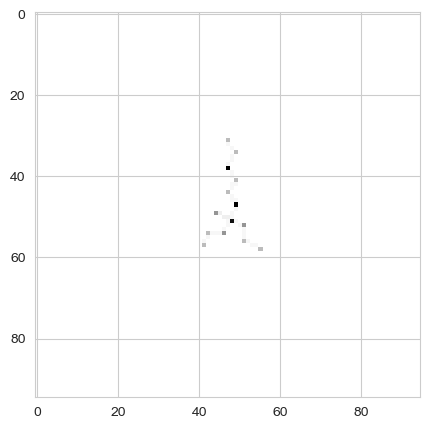

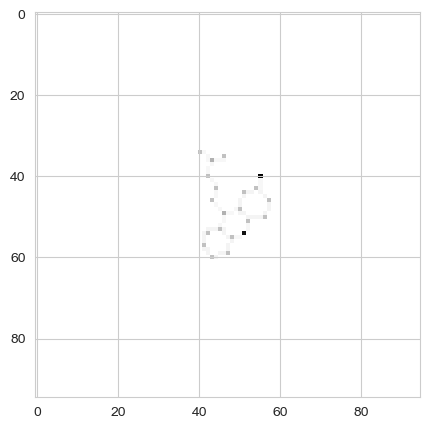

In [8]:
plot_greyscale(arr)

In [3]:
transform2 = transforms.Compose(
    [
        SMILESToMol(),
        MolToRDKitDescriptors(),
        # transforms.Normalize(),  # need to standardise somehow
        BinaryToxicity(),
    ]
)

In [4]:
tox21_2 = Tox21Dataset(csv_path="../data/tox21_raw.csv", transform=transform2)
tox21_2.remove_nan()

In [5]:
dataloader2 = DataLoader(tox21_2, batch_size=2, shuffle=True)

# use a generator to get the first batch
dataloader_iter2 = iter(dataloader2)
batch = next(dataloader_iter2)
arr, labels = batch
print(arr.shape, labels)

torch.Size([2, 125]) tensor([0, 0])


[12:37:30] DEPRECATION WARNING: please use MorganGenerator
[12:37:30] DEPRECATION WARNING: please use MorganGenerator
[12:37:30] DEPRECATION WARNING: please use MorganGenerator
[12:37:30] DEPRECATION WARNING: please use MorganGenerator
[12:37:30] DEPRECATION WARNING: please use MorganGenerator
[12:37:30] DEPRECATION WARNING: please use MorganGenerator
